In [2]:
import torch
import torch.nn as nn
import numpy as np    
import ft_model.ftransformer as ftransformer
import ft_model.ftutils as ftutils
import matplotlib.pyplot as plt

tensor([[ 3.1416],
        [ 0.9191],
        [-0.0674],
        [ 0.9447],
        [-3.1416]])
tensor([[ 3.1416],
        [ 0.9865],
        [-1.0120],
        [-3.1416]])
Epoch: 0
Total Loss: 566.787095785141
-----------------------------------
Epoch: 10
Total Loss: 401.9095561504364
-----------------------------------
Epoch: 20
Total Loss: 374.52692663669586
-----------------------------------
Epoch: 30
Total Loss: 368.61493599414825
-----------------------------------
Epoch: 40
Total Loss: 363.79975521564484
-----------------------------------
Epoch: 50
Total Loss: 361.06033331155777
-----------------------------------
Epoch: 60
Total Loss: 358.2712339758873
-----------------------------------
Epoch: 70
Total Loss: 355.77490097284317
-----------------------------------
Epoch: 80
Total Loss: 354.22424352169037
-----------------------------------
Epoch: 90
Total Loss: 353.69675201177597
-----------------------------------
Epoch: 100
Total Loss: 352.9771399497986
---------------------

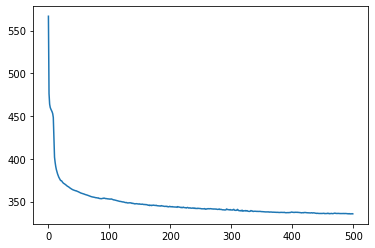

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

d_model = 20
n_head = 1
n_layers = 1

N = 30000
seq_len = 3
model = ftransformer.FloatTransformer(d_model, n_head, n_layers, device, pos_encoding = False).to(device)
src, tgt = ftutils.generateSeqs(N, seq_len, operation = "subtraction")
opt = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.MSELoss()
num_batch, src_batches, tgt_batches = ftutils.batchify(src, tgt)
    
print(src_batches[0][0])
print(tgt_batches[0][0])
    
n_epochs = 500
best_model, loss, epochs = ftutils.train(model, n_epochs, opt, criterion, device, src_batches, tgt_batches, num_batch)
    
torch.save(model.state_dict(), 'subt_tfmr')
plt.plot(epochs, loss)
plt.show()